### Задание 1.

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


### Решение.

Пусть событие $m$ - пойманный человек является убийцей (допустим, что правоохранительные органы работают хорошо и не задержали случайного человека, а сделали это проведя некоторую следственную работу) и присвоим вероятность этого события $p(m) = 0.1$

Событие $b$ - означает что кровь пойманного человека совпадает с найденной и $p(b | \bar{m}) = 0.01$ - вероятность что этот тип крови принадлежит не убийце, $p(b | m) = 1$ - принадлежит убийце.

Правильно было бы получить вероятность, что пойманный человек убийца после получения новых улик, таких как найденная кровь.

$$p(m | b) = \frac{p(m) \cdot p(b | m)}{p(m)\cdot p(b | m) + p(\bar{m})\cdot p(b | \bar{m})} = 
             \frac{0.1 \cdot 1}{0.1\cdot 1 + 0.9\cdot 0.01} = 0.917$$
             
Что даёт достаточно высокую вероятность того, что пойманный человек убийца.

Вместо этого прокурор привел вероятность $1 - p(b | \bar{m})$ которая не равняется $p(m | b)$ и согласно его рассуждениям все носители указанной группы являются убийцами с вероятностью $99\%$.

### Задание 2.

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Решение.

Адвокат мог бы указать, что правоохранительные органы задержали случайного человека, который просто выгуливал собаку поблизости, тогда вероятность события, что пойманный человек является убийцей $p(m) = 0.0001$ (скажем, $10 000$ людей гуляет с собаками по утрам.)

Повторяя рассуждения выше получим:

$$p(m | b) = \frac{p(m) \cdot p(b | m)}{p(m)\cdot p(b | m) + p(\bar{m})\cdot p(b | \bar{m})} = 
             \frac{0.0001 \cdot 1}{0.0001\cdot 1 + 0.9999\cdot 0.01} = 0.0099$$
             
И тогда вероятность, что пойманный человек убийца всего 1%.

Вместо этого адвокат утверждает, что любой из людей, имеющих тип крови убийцы, мог это сделать с равной вероятностью, что начисто противоречит житейскому опыту.

### Задание 3.

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

False positive error: 0.838983
False negative error: 0.000531


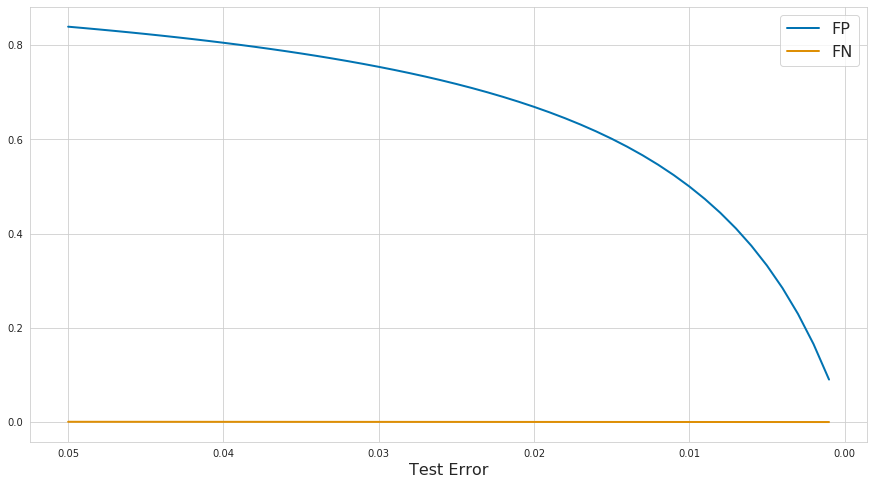

In [4]:
## если data = 1, false positive; data = 0, false negative.
def compute_posterior(data, prior_prob=0.01, test_error=0.05):
    if data == 1:
        return ((1-prior_prob) * test_error) / ((1-prior_prob) * test_error + prior_prob * (1-test_error))
    elif data == 0:
        return (prior_prob * test_error) / (prior_prob * test_error + (1-prior_prob) * (1-test_error))
    else:
        return None

print("False positive error: %.6f" % compute_posterior(1) )
print("False negative error: %.6f" % compute_posterior(0) )

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'prior_prob'])
xs = np.arange(0.05, 0, -0.001)
ys_fp = vector_posterior(1, test_error=xs)
ys_fn = vector_posterior(0, test_error=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_fp, linewidth=2, label=r'FP')
ax.plot(xs, ys_fn, linewidth=2, label='FN')
plt.gca().invert_xaxis()
ax.set_xlabel('Test Error', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()

Поскольку ошибка негативного результата для больного человека крайне мала, то врачам следует сконцентрироваться на улучшении результатов при ошибке положительного результата для здорового человека.